# Exploratory Visual Analysis with Python

### This script contains the following points:
#### 1. Import libraries and data
#### 2. Create a subset of the data
#### 3. Create a heatmap correlation matrix
#### 4. Create scatterplots for the variables with the strongest correlations
#### 5. Create a pair plot of the data set
#### 6. Create categorical plots

## 01 Import libraries and data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
%matplotlib inline

In [3]:
# import data
path = 'I:/CF/Immersion into Data Analystics/6 Advanced Analytics and Dashboard Design/SteamGames'

In [4]:
path

'I:/CF/Immersion into Data Analystics/6 Advanced Analytics and Dashboard Design/SteamGames'

In [5]:
df_steam1 = pd.read_excel(os.path.join(path, '02 Data', 'Prepared Data', 'gamesc.xlsx'), index_col = False)

In [6]:
# change display options
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [7]:
# inspect data
df_steam1.head()

,AppID,Name,Release date,release_year,release_month,Estimated owners,Estimated owner level,Peak CCU,Required age,Price,DLC count,Windows,Mac,Linux,Operating Systems,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Avg playtime all,Avg playtime recent,Median playtime all,Median playtime recent,Developer,Publishers,Developer Country,Single-player,Multi-player,Co-op,PVP,Gameplay,VR,MMO,Indie,Early Access,Free to Play,Primary Genre
0,10.0,Counter-Strike,2000-11-01,2000.0,11.0,10000000 - 20000000,11.0,13230.0,0.0,9.99,0.0,1.0,1.0,1.0,"Windows, Mac, Linux",88.0,0.0,198387.0,5135.0,0.0,122770.0,10524.0,1733.0,228.0,733.0,Valve,Valve,Germany,0.0,1.0,0.0,1.0,"Multi, PvP",0.0,0.0,0.0,0.0,0.0,Action
1,20.0,Team Fortress Classic,1999-04-01,1999.0,4.0,5000000 - 10000000,10.0,110.0,0.0,4.99,0.0,1.0,1.0,1.0,"Windows, Mac, Linux",0.0,0.0,5677.0,923.0,0.0,4722.0,143.0,0.0,23.0,0.0,Valve,Valve,United States,0.0,1.0,0.0,1.0,"Multi, PvP",0.0,0.0,0.0,0.0,0.0,Action
2,30.0,Day of Defeat,2003-05-01,2003.0,5.0,5000000 - 10000000,10.0,106.0,0.0,4.99,0.0,1.0,1.0,1.0,"Windows, Mac, Linux",79.0,0.0,5179.0,566.0,0.0,3246.0,1397.0,0.0,27.0,0.0,Valve,Valve,France,0.0,1.0,0.0,0.0,Multi,0.0,0.0,0.0,0.0,0.0,Action
3,40.0,Deathmatch Classic,2001-06-01,2001.0,6.0,5000000 - 10000000,10.0,2.0,0.0,4.99,0.0,1.0,1.0,1.0,"Windows, Mac, Linux",0.0,0.0,1929.0,428.0,0.0,1570.0,945.0,0.0,10.0,0.0,Valve,Valve,France,0.0,1.0,0.0,1.0,"Multi, PvP",0.0,0.0,0.0,0.0,0.0,Action
4,50.0,Half-Life: Opposing Force,1999-11-01,1999.0,11.0,5000000 - 10000000,10.0,120.0,0.0,4.99,0.0,1.0,1.0,1.0,"Windows, Mac, Linux",0.0,0.0,14333.0,718.0,0.0,12374.0,214.0,0.0,66.0,0.0,Gearbox Software,Valve,United States,1.0,1.0,0.0,0.0,"Single, Multi",0.0,0.0,0.0,0.0,0.0,Action


## 02 Create a subset of the data

In [8]:
# list columns
df_steam1.columns

Index(['AppID', 'Name', 'Release date', 'release_year', 'release_month',
       'Estimated owners', 'Estimated owner level', 'Peak CCU', 'Required age',
       'Price', 'DLC count', 'Windows', 'Mac', 'Linux', 'Operating Systems',
       'Metacritic score', 'User score', 'Positive', 'Negative',
       'Achievements', 'Recommendations', 'Avg playtime all',
       'Avg playtime recent', 'Median playtime all', 'Median playtime recent',
       'Developer', 'Publishers', 'Developer Country', 'Single-player',
       'Multi-player', 'Co-op', 'PVP', 'Gameplay', 'VR', 'MMO', 'Indie',
       'Early Access', 'Free to Play', 'Primary Genre'],
      dtype='object')

In [9]:
# create subset based on columns, dropping non-numeric data and appid
df_steam2 = df_steam1.drop(columns = ['AppID', 'Name', 'Release date', 'Publishers', 'Estimated owners', 'Developer', 'Developer Country', 'Primary Genre', 'Operating Systems', 'Gameplay'])

In [10]:
# check output
df_steam2.head()

,release_year,release_month,Estimated owner level,Peak CCU,Required age,Price,DLC count,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Avg playtime all,Avg playtime recent,Median playtime all,Median playtime recent,Single-player,Multi-player,Co-op,PVP,VR,MMO,Indie,Early Access,Free to Play
0,2000.0,11.0,11.0,13230.0,0.0,9.99,0.0,1.0,1.0,1.0,88.0,0.0,198387.0,5135.0,0.0,122770.0,10524.0,1733.0,228.0,733.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1999.0,4.0,10.0,110.0,0.0,4.99,0.0,1.0,1.0,1.0,0.0,0.0,5677.0,923.0,0.0,4722.0,143.0,0.0,23.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2003.0,5.0,10.0,106.0,0.0,4.99,0.0,1.0,1.0,1.0,79.0,0.0,5179.0,566.0,0.0,3246.0,1397.0,0.0,27.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2001.0,6.0,10.0,2.0,0.0,4.99,0.0,1.0,1.0,1.0,0.0,0.0,1929.0,428.0,0.0,1570.0,945.0,0.0,10.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1999.0,11.0,10.0,120.0,0.0,4.99,0.0,1.0,1.0,1.0,0.0,0.0,14333.0,718.0,0.0,12374.0,214.0,0.0,66.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 03 Create a heatmap correlation matrix

In [11]:
# creating correlation table
df_steam2.corr()

,release_year,release_month,Estimated owner level,Peak CCU,Required age,Price,DLC count,Windows,Mac,Linux,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Avg playtime all,Avg playtime recent,Median playtime all,Median playtime recent,Single-player,Multi-player,Co-op,PVP,VR,MMO,Indie,Early Access,Free to Play
release_year,1.000000,-0.037756,-0.433396,-0.015074,-0.120140,0.000294,-0.015603,0.005509,-0.174525,-0.128877,-0.335770,-0.010569,-0.051359,-0.034239,-0.034471,-0.050075,-0.078965,-0.022549,-0.043049,-0.019377,0.004910,-0.098314,-0.017376,0.015734,-0.050875,-0.022223,0.088287,0.111354,0.052907
release_month,-0.037756,1.000000,-0.027638,0.006772,-0.005243,0.014899,0.002054,0.008065,-0.014808,-0.009439,-0.017446,0.008085,0.002482,0.005248,-0.011224,0.003139,0.000381,0.001257,-0.001288,0.001084,-0.004812,0.004673,0.003654,0.011656,-0.007024,0.001810,-0.018306,0.013926,-0.004298
Estimated owner level,-0.433396,-0.027638,1.000000,0.120827,0.194820,0.148526,0.058126,0.005343,0.142798,0.113714,0.456060,-0.005883,0.182987,0.151540,0.042823,0.190300,0.212363,0.171920,0.100598,0.166515,-0.038896,0.182328,0.138898,0.084612,0.038880,0.109334,-0.099002,-0.065160,0.084024
Peak CCU,-0.015074,0.006772,0.120827,1.000000,0.035038,0.030227,0.012144,0.000533,0.013154,0.014462,0.062684,-0.000636,0.839298,0.764988,0.008222,0.700413,0.212776,0.099866,0.031839,0.057641,-0.034371,0.040044,0.038945,0.024744,0.025598,0.026694,-0.027430,-0.003053,0.029548
Required age,-0.120140,-0.005243,0.194820,0.035038,1.000000,0.108186,0.014666,-0.008693,-0.014201,-0.009173,0.190303,0.086651,0.063469,0.056786,0.002173,0.082254,0.051631,0.055660,0.018287,0.052727,0.010877,0.034062,0.035416,-0.000052,-0.003876,0.008266,-0.102772,-0.023415,-0.012945
Price,0.000294,0.014899,0.148526,0.030227,0.108186,1.000000,0.049792,-0.025950,0.012534,0.002636,0.176199,-0.000102,0.034189,0.026841,0.002376,0.051565,0.080996,0.070521,0.051555,0.069792,-0.020400,0.079221,0.078602,0.037247,0.023335,-0.027780,-0.159277,0.041287,-0.191486
DLC count,-0.015603,0.002054,0.058126,0.012144,0.014666,0.049792,1.000000,0.000785,0.017692,0.008304,0.025576,0.000423,0.018700,0.014521,0.015734,0.020072,0.038932,0.022892,0.016293,0.022555,-0.013811,0.030032,0.028498,0.008305,0.001105,0.002925,-0.016603,-0.010415,0.003909
Windows,0.005509,0.008065,0.005343,0.000533,-0.008693,-0.025950,0.000785,1.000000,-0.033780,0.001691,0.004896,0.000491,0.000850,0.000708,0.002103,0.000933,0.001801,0.001178,0.001163,0.001169,0.037273,-0.000042,-0.001447,0.002784,-0.010050,-0.004795,0.020546,0.007228,0.002743
Mac,-0.174525,-0.014808,0.142798,0.013154,-0.014201,0.012534,0.017692,-0.033780,1.000000,0.579501,0.108976,0.003017,0.026011,0.009999,0.004251,0.022404,0.029534,0.003278,0.016550,0.001953,0.021523,0.028462,0.017054,0.015044,-0.002321,0.003899,0.077487,-0.063350,0.003786
Linux,-0.128877,-0.009439,0.113714,0.014462,-0.009173,0.002636,0.008304,0.001691,0.579501,1.000000,0.089417,0.007147,0.027902,0.011404,0.010586,0.024115,0.020646,0.003168,0.010528,0.000234,0.033330,0.026213,0.029879,0.011701,0.001177,-0.004304,0.098427,-0.042050,-0.011134


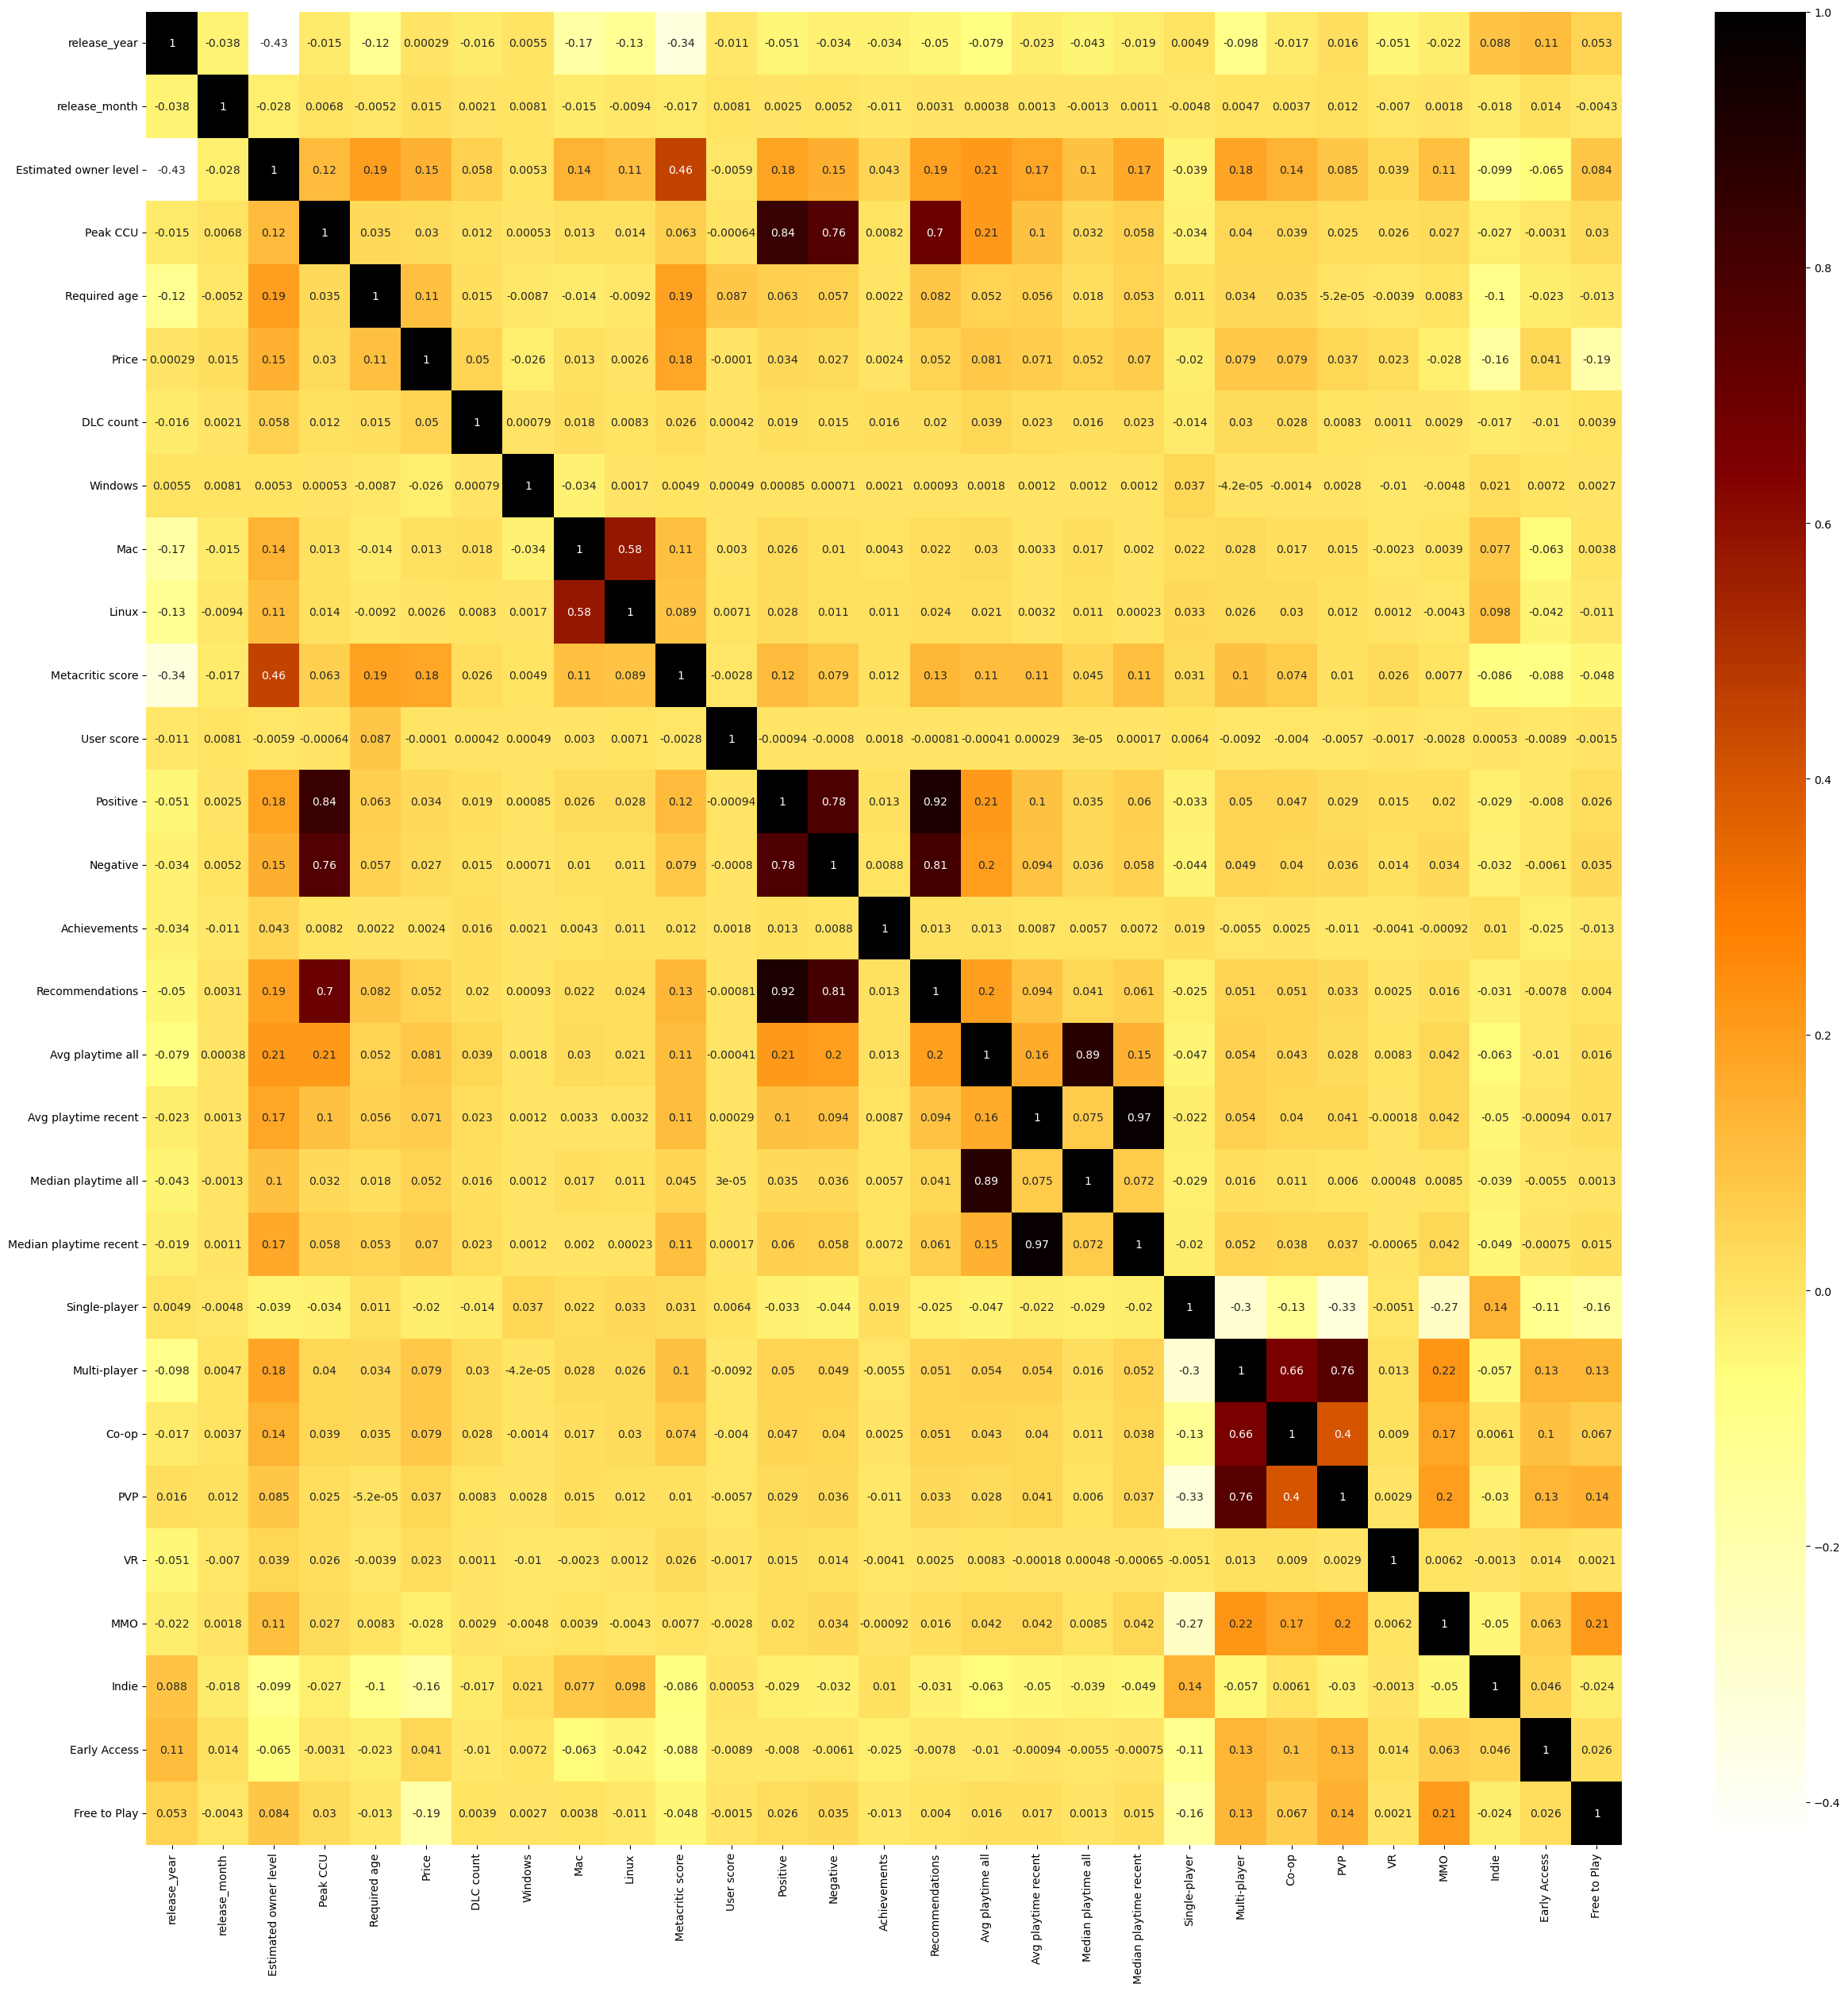

In [12]:
# Create a correlation heatmap with matplotlib
fig,ax = plt.subplots(figsize=(30,30))
color1 = plt.get_cmap('afmhot_r')
color1.set_bad('lightblue')
corr = sns.heatmap(df_steam2.corr(), annot = True, cmap = color1, ax=ax ) 

In [13]:
a = df_steam2.corr()

In [14]:
a.to_clipboard()

### Discuss what the coefficients in the plot mean in terms of the relationships between variables

#### In the plot above, black squares represent very strong positive correlation whilte white squares represent a negative correlation. Red squares are also strong correlations while varies shades of orange to yellow can be medium to weak correlations. 

#### There are strong correlations between ratings, recommendations and peak ccu (concurrent users). A few other strong correlations include correlations between games available on Mac and Linux, and games that are multiplayer and PvP or Co-op. 

## 04 Create scatterplots for the variables with the strongest correlations

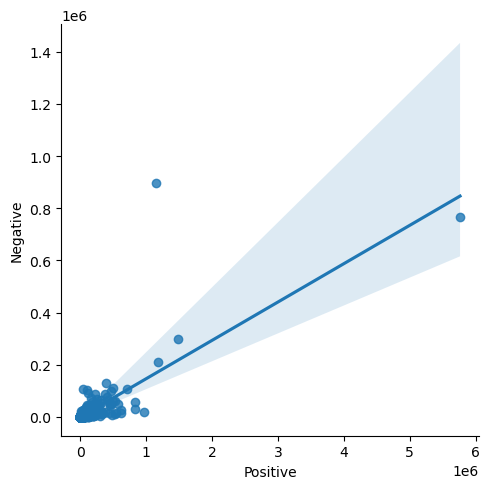

In [15]:
# Create scatterplot for ratings
sns.lmplot(x = 'Positive', y = 'Negative', data = df_steam2)

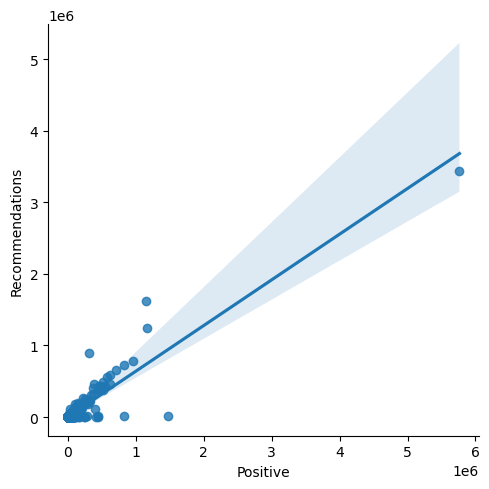

In [16]:
# Create scatterplot for positive ratings recommendations
sns.lmplot(x = 'Positive', y = 'Recommendations', data = df_steam2)

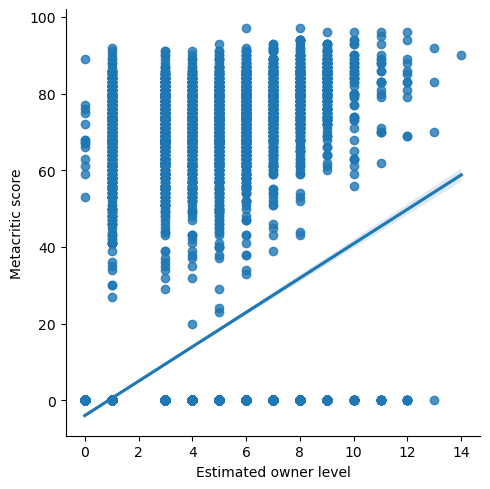

In [17]:
# Create scatterplot for owner level and metacritic score
sns.lmplot(x = 'Estimated owner level', y = 'Metacritic score', data = df_steam2)

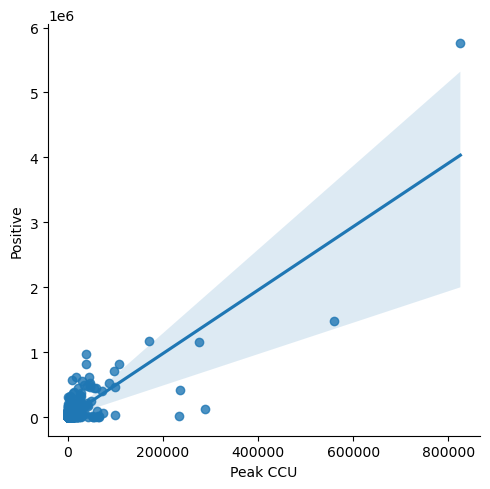

In [18]:
# Create scatterplot for peak ccu and positive ratings
sns.lmplot(x = 'Peak CCU', y = 'Positive', data = df_steam2)

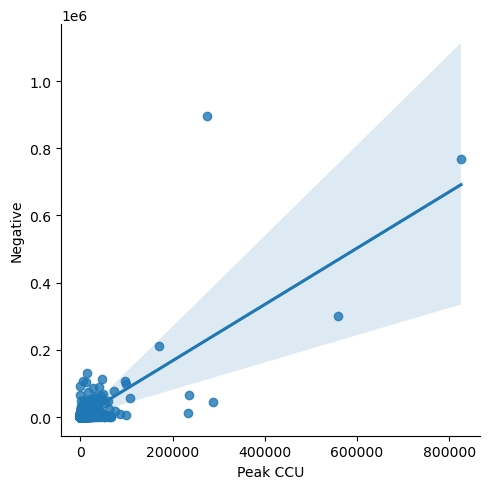

In [19]:
# Create scatterplot for peak ccu and negative ratings
sns.lmplot(x = 'Peak CCU', y = 'Negative', data = df_steam2)

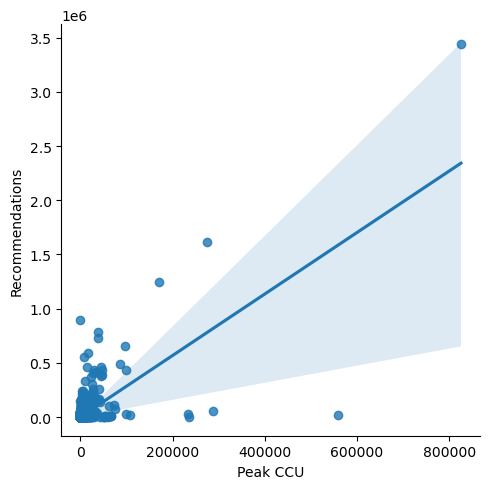

In [20]:
# Create scatterplot for peak ccu and recommendations
sns.lmplot(x = 'Peak CCU', y = 'Recommendations', data = df_steam2)

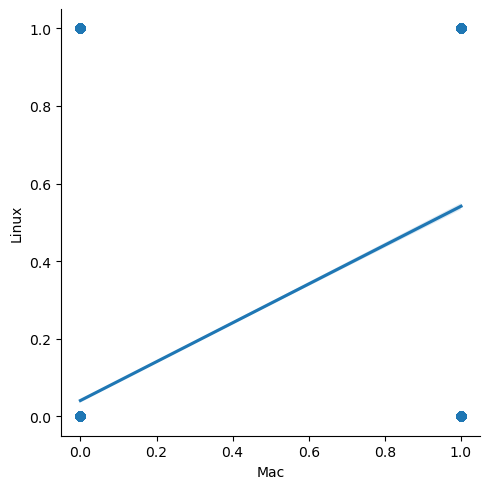

In [21]:
# Create scatterplot for Mac and Linux
sns.lmplot(x = 'Mac', y = 'Linux', data = df_steam2)

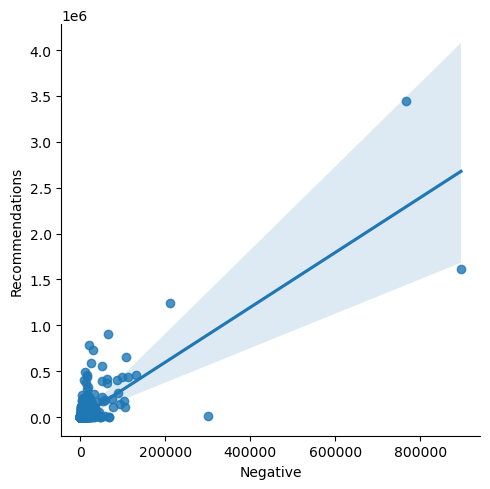

In [22]:
# Create scatterplot for negative ratings and recommendations
sns.lmplot(x = 'Negative', y = 'Recommendations', data = df_steam2)

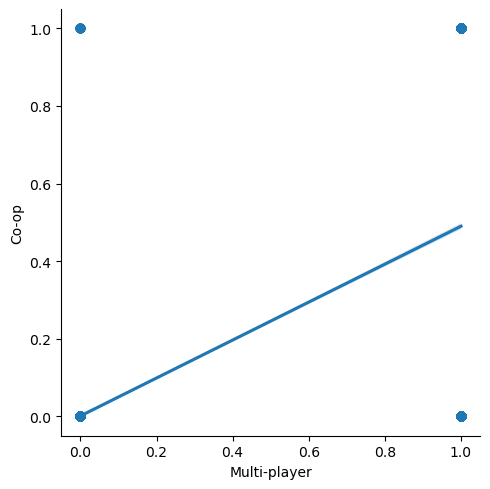

In [23]:
# Create scatterplot for multiplayer and co-op
sns.lmplot(x = 'Multi-player', y = 'Co-op', data = df_steam2)

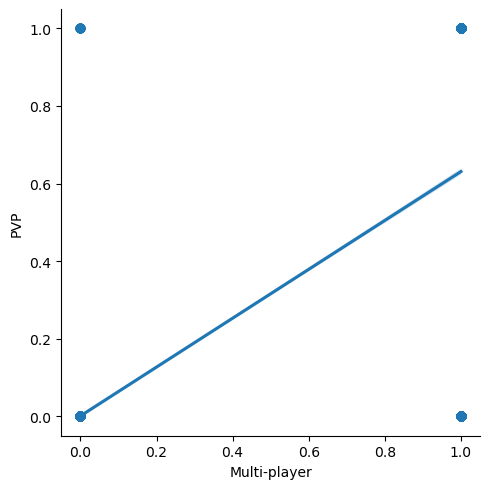

In [24]:
# Create scatterplot for multiplayer and PvP
sns.lmplot(x = 'Multi-player', y = 'PVP', data = df_steam2)

### Discuss the output

#### Correlations for game play type do not appear to be based on much data, although they still make sense as games that are co-op and PvP, by nature, are multi-player games. The correlation between positive ratings and recommendations is much more clear than that for negative ratings and recommendations. The latter seems to exist due to outliers. I am unclear as to the Metacritic score and the owner number rankings.

## 05 Create a pair plot of the data set

In [25]:
sns.pairplot(df_steam2, diag_kind='kde', corner = True)

### Comment on the distribution of the variables and mark variables you'd like to explore further and why.

#### There do appear to be patterns, although they aren't necessairly correlations. For example, more recent years seem to have a greater number of higher priced games, although there are still plenty of free and lower priced games. There also seems to be an outlier in average game time played. I do not think this average is an error, but it would be interesting to see what game that is, and what kind of games in general have the highest amount of hours played. Average and Median playtime maximums always appear to increase in more recent years. It also appears that more expensive games have less acheivements and vice versa. This same pattern appears between playtime and price. I am more interested in specifics such as which games or genres are more popular. 



## 06 Create categorical plots

In [26]:
# setting palette for colorblind
sns.set_palette('colorblind')

In [27]:
df_steam1.columns

Index(['AppID', 'Name', 'Release date', 'release_year', 'release_month',
       'Estimated owners', 'Estimated owner level', 'Peak CCU', 'Required age',
       'Price', 'DLC count', 'Windows', 'Mac', 'Linux', 'Operating Systems',
       'Metacritic score', 'User score', 'Positive', 'Negative',
       'Achievements', 'Recommendations', 'Avg playtime all',
       'Avg playtime recent', 'Median playtime all', 'Median playtime recent',
       'Developer', 'Publishers', 'Developer Country', 'Single-player',
       'Multi-player', 'Co-op', 'PVP', 'Gameplay', 'VR', 'MMO', 'Indie',
       'Early Access', 'Free to Play', 'Primary Genre'],
      dtype='object')

<AxesSubplot: xlabel='release_year', ylabel='count'>

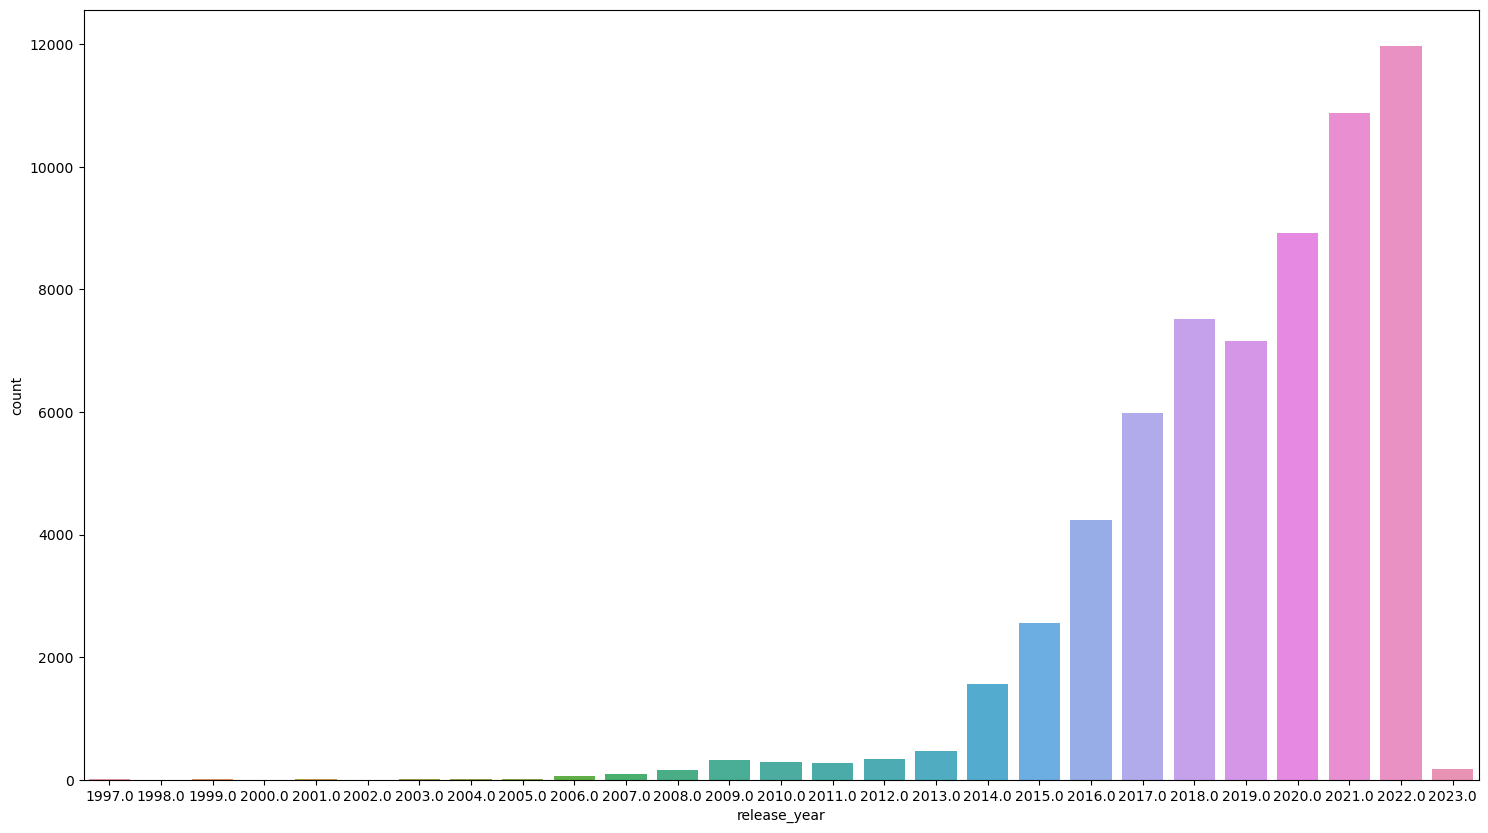

In [28]:
plt.figure(figsize=(18,10))
sns.countplot(x='release_year', data=df_steam1)

<AxesSubplot: xlabel='Estimated owner level', ylabel='count'>

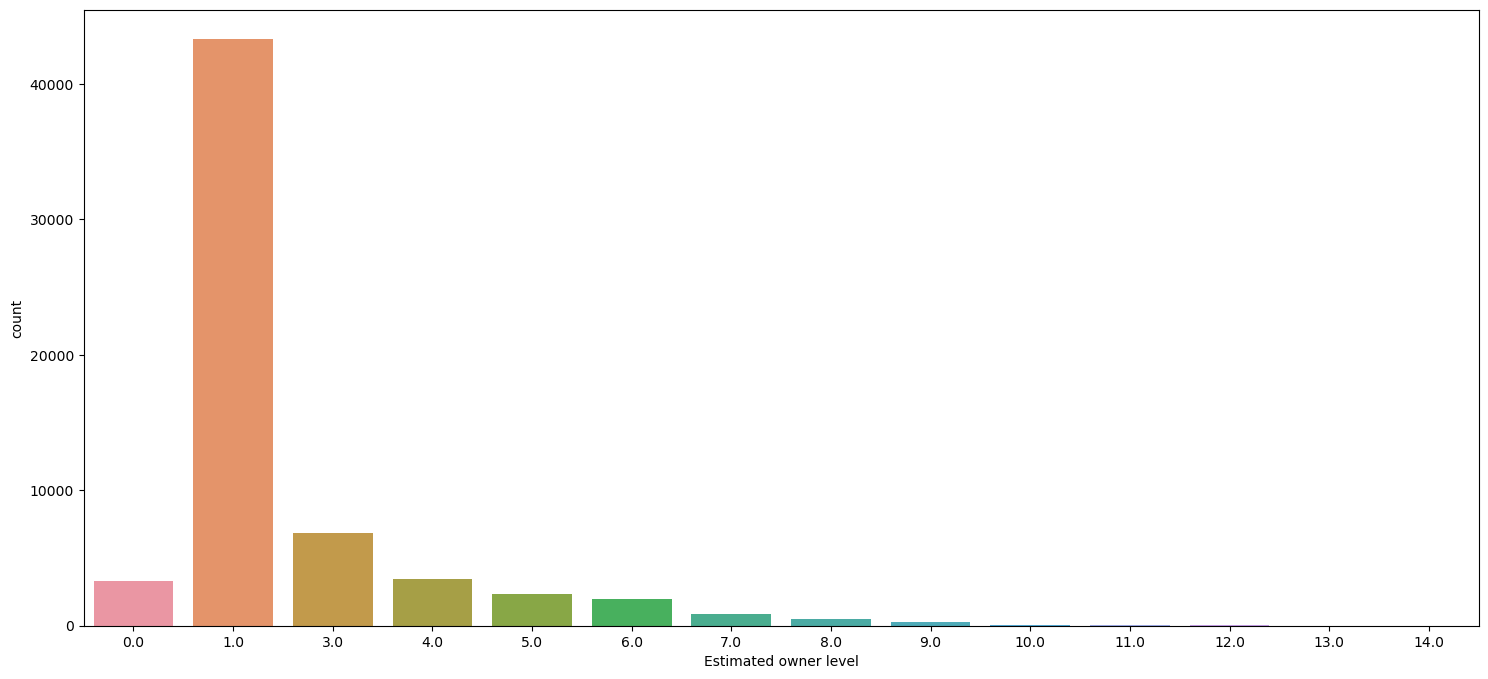

In [29]:
plt.figure(figsize=(18,8))
sns.countplot(x='Estimated owner level', data=df_steam1)

<AxesSubplot: xlabel='Operating Systems', ylabel='count'>

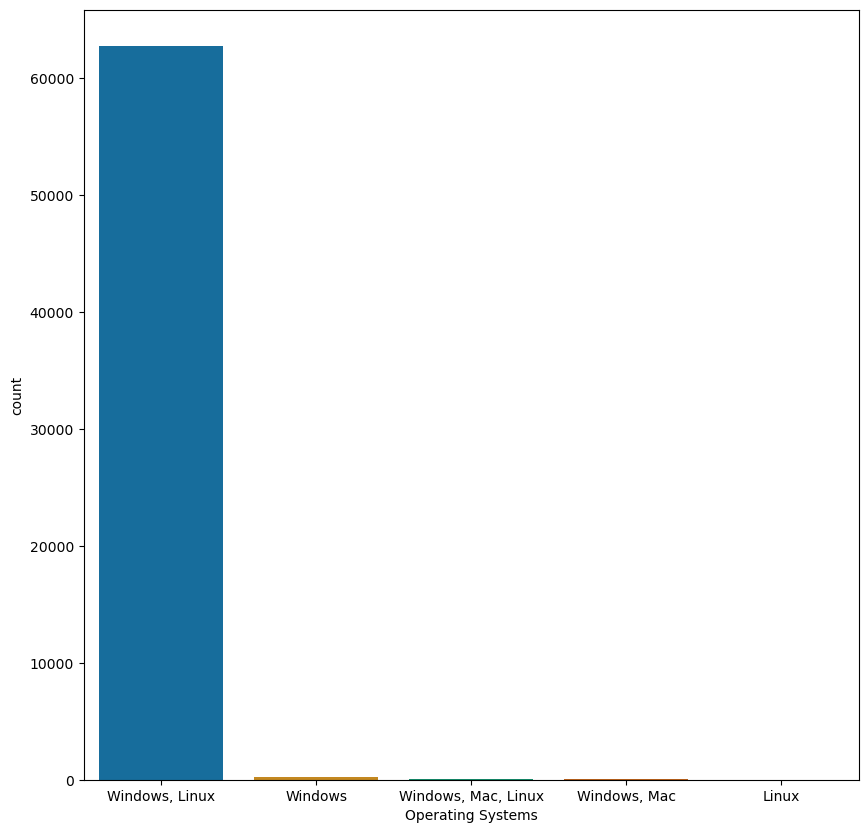

In [40]:
plt.figure(figsize=(10,10))
sns.countplot(x='Operating Systems', data=df_steam1, order = df_steam1['Operating Systems'].value_counts().index)

<AxesSubplot: xlabel='Gameplay', ylabel='count'>

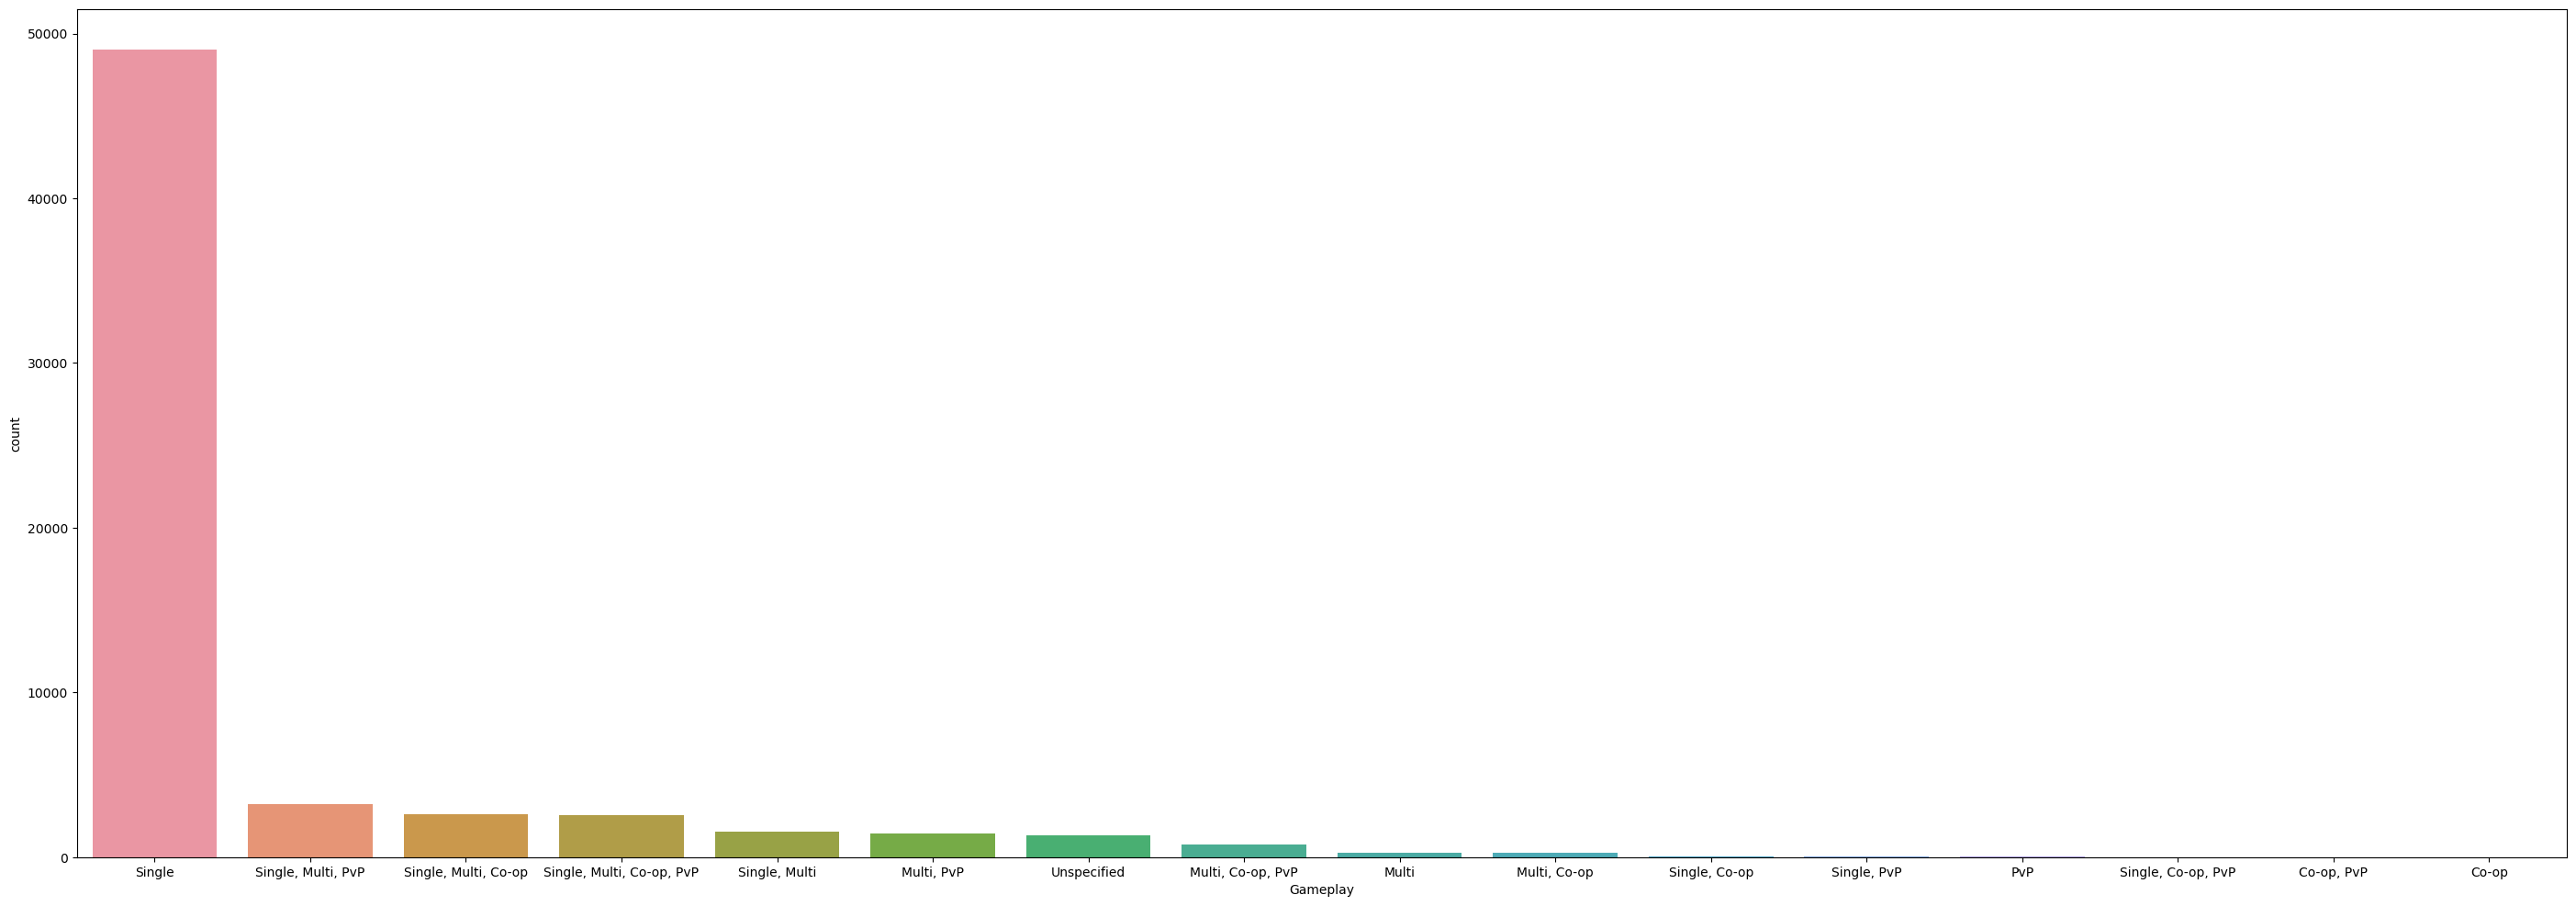

In [43]:
plt.figure(figsize=(35,12))
sns.countplot(x='Gameplay', data=df_steam1, order = df_steam1['Gameplay'].value_counts().index)

<AxesSubplot: xlabel='Primary Genre', ylabel='count'>

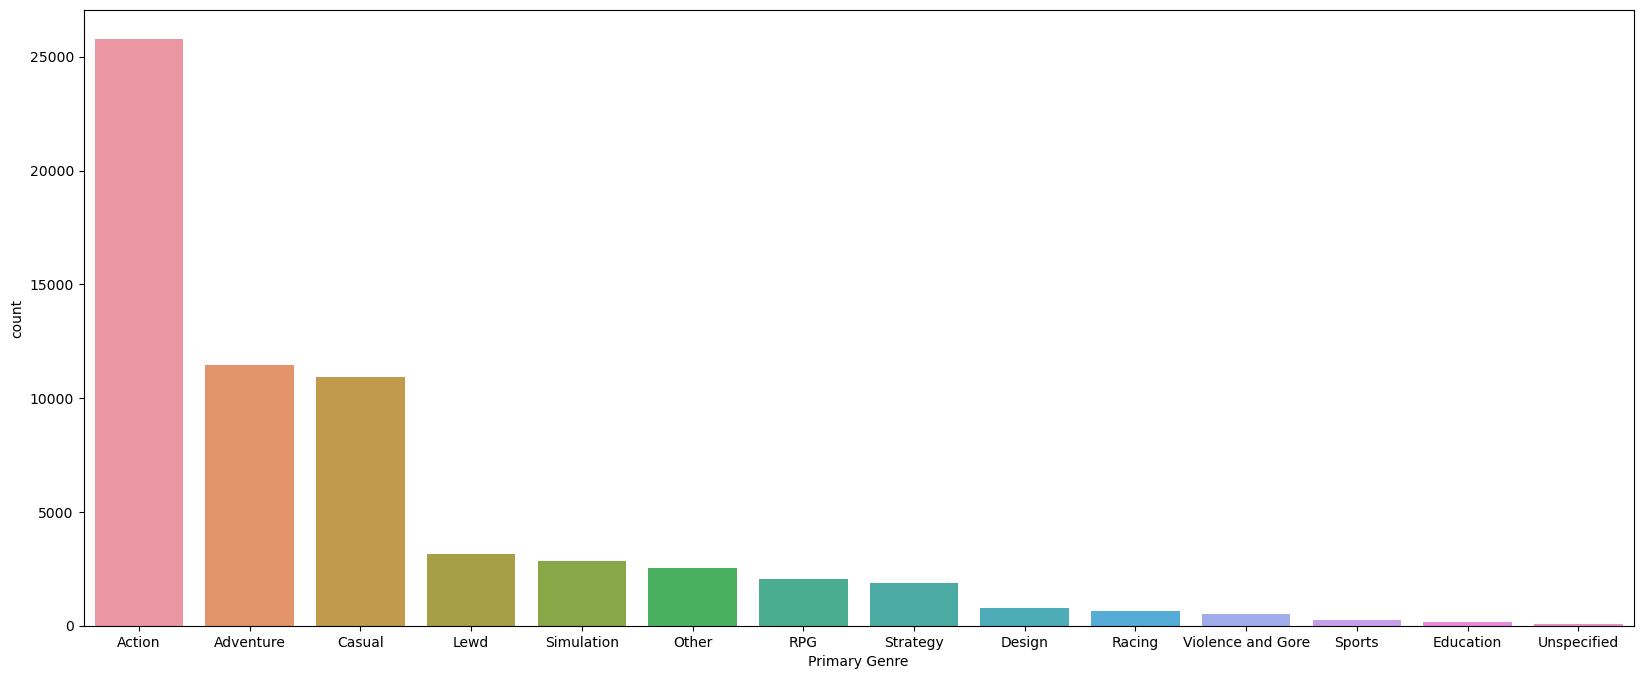

In [39]:
plt.figure(figsize=(20,8))
sns.countplot(x='Primary Genre', data=df_steam1, order = df_steam1['Primary Genre'].value_counts().index)

<AxesSubplot: xlabel='Developer Country', ylabel='count'>

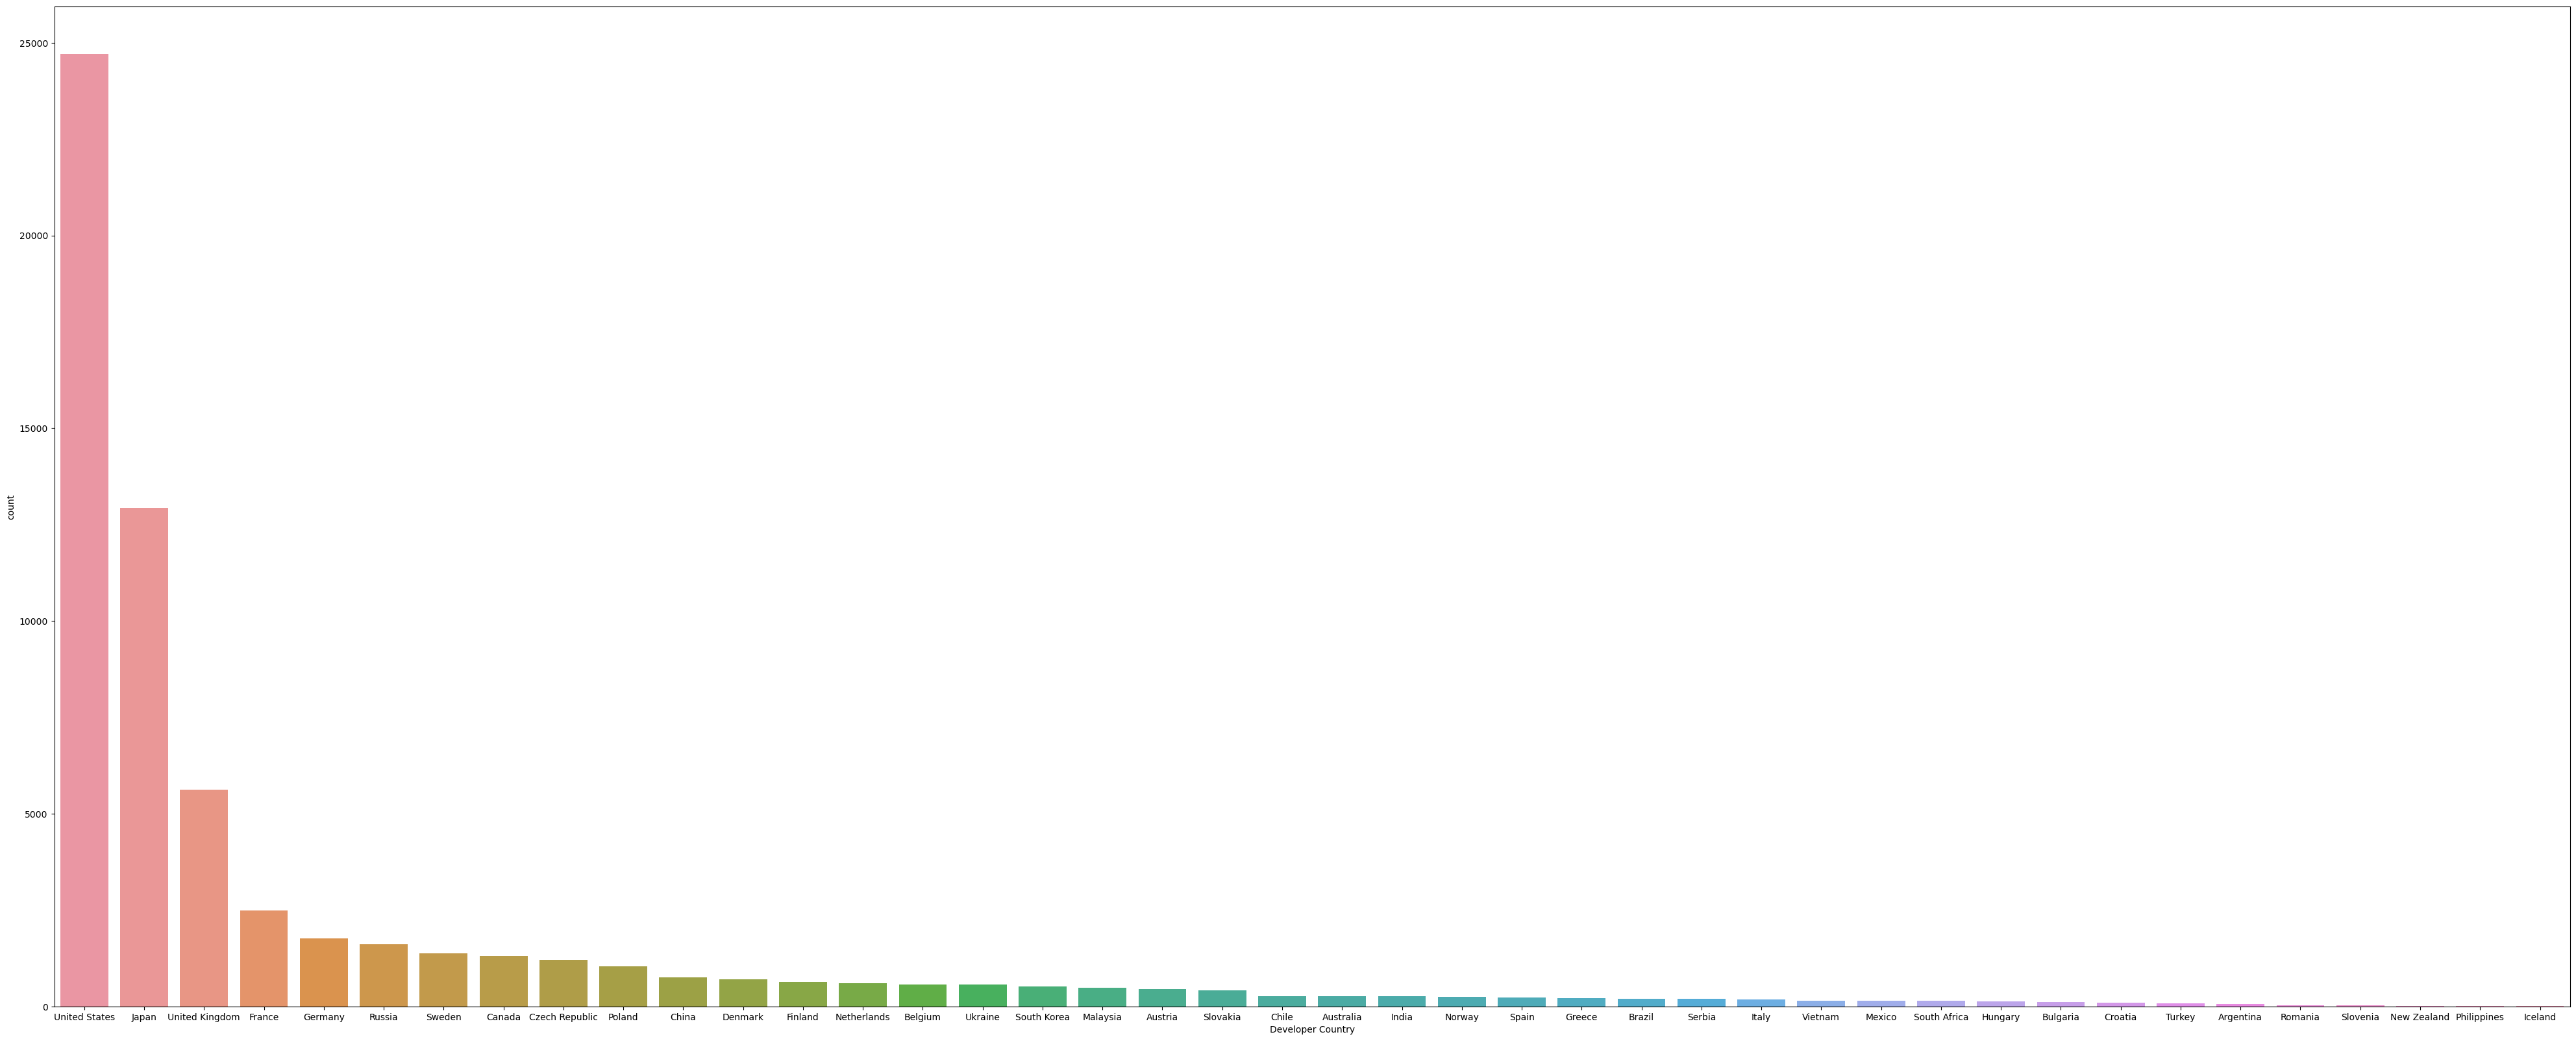

In [44]:
plt.figure(figsize=(50,20))
sns.countplot(x='Developer Country', data=df_steam1, order = df_steam1['Developer Country'].value_counts().index) # this variable had a lot of missing values so had excel generate close approximations for purpose of project. Not an actual reflection of countries.

<AxesSubplot: xlabel='VR', ylabel='count'>

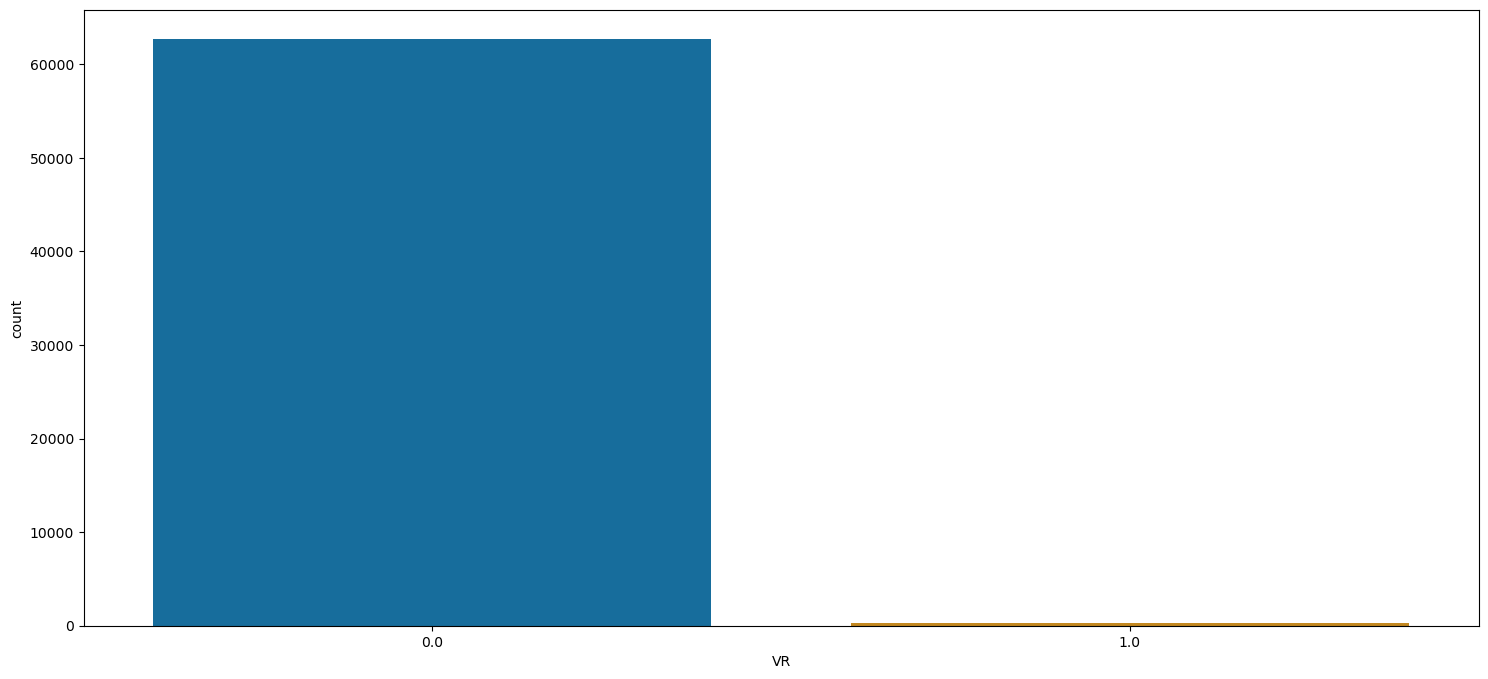

In [34]:
plt.figure(figsize=(18,8))
sns.countplot(x='VR', data=df_steam1)

<AxesSubplot: xlabel='Indie', ylabel='count'>

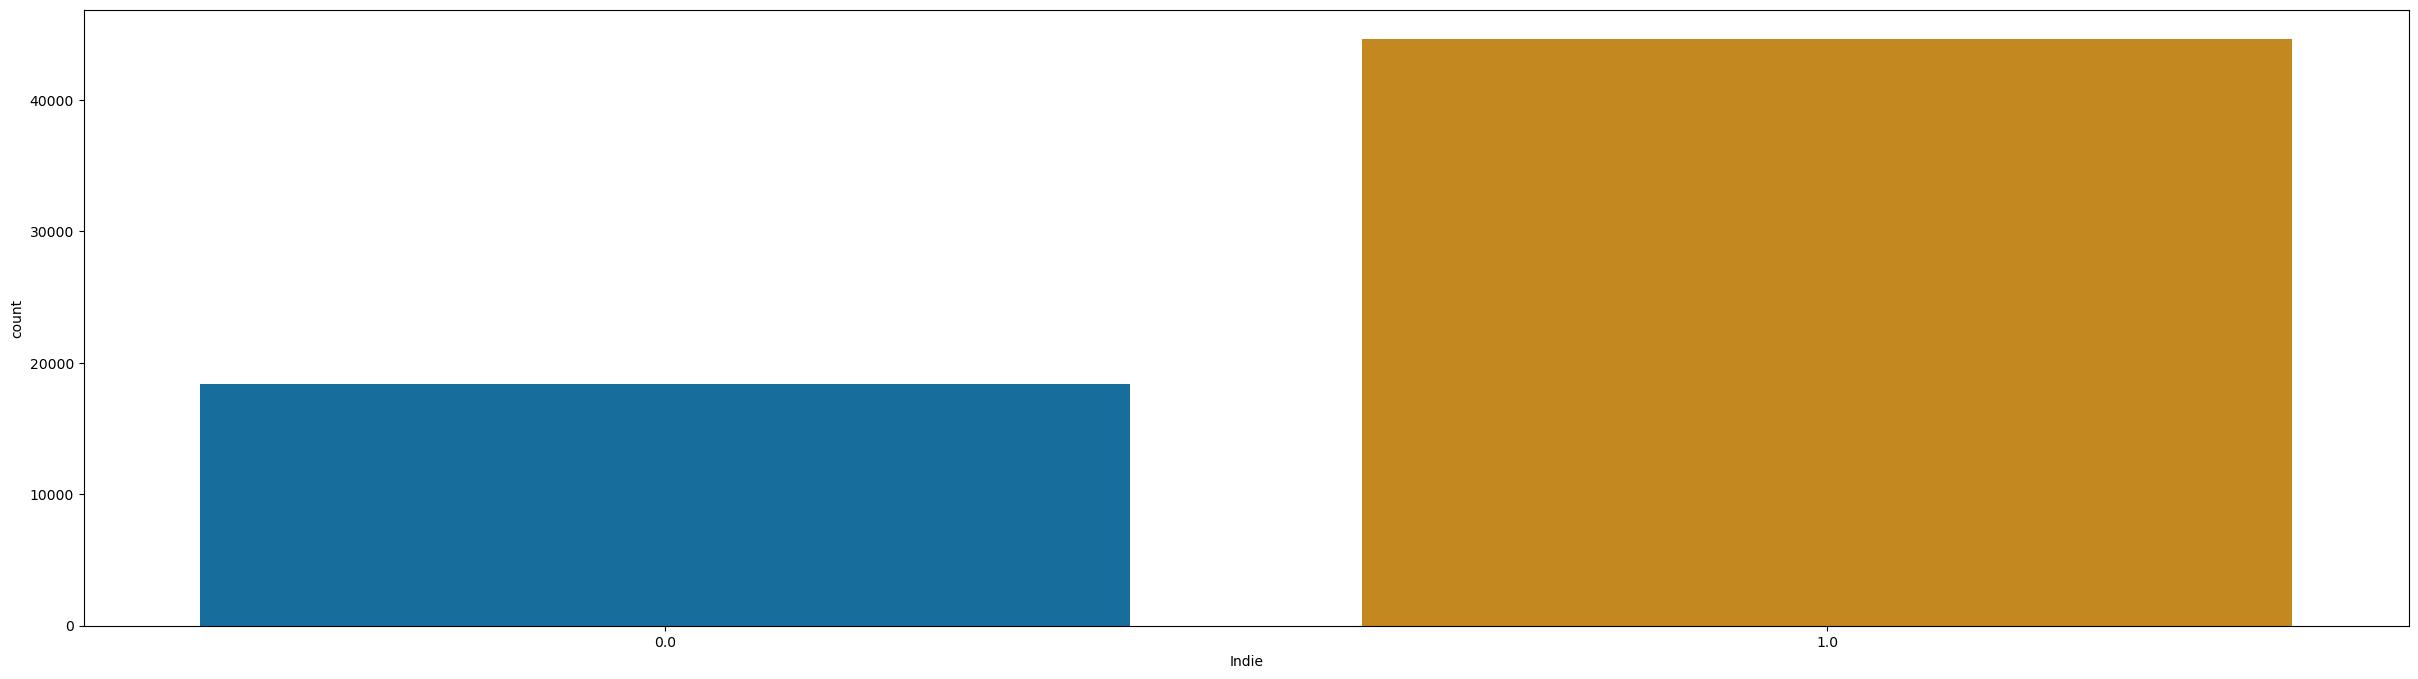

In [35]:
plt.figure(figsize=(30,8))
sns.countplot(x='Indie', data=df_steam1)